In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

/Users/samrosales/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the data from .txt file, ignore first three rows
data = np.loadtxt("ASTR19_S22_group_project_data.txt", skiprows=3, dtype='str')

# Extract day, time, and height
d = data[:, 0].astype(int)
time_strings = data[:, 1]

# Convert time strings to total minutes since the starting time of collection (hour 0)
t_minutes = np.array([int(time.split(':')[0]) * 60 + int(time.split(':')[1]) for time in time_strings])

# Convert total minutes to hours and add the day offset
t = (t_minutes / 60) + (d - 1) * 24

# Tide height column from the data
h = data[:, 2].astype(float)

# Define a range of x values for plotting
x = np.arange(8, 984, 6.2)

In [3]:
# Convert tide height data to a numpy array, makes it easier to manage
actual_tide_values = np.array(h)

#incorporate error of 0.25 ft to the height values
error = 0.25

# Initial guess for the fitted tide value function
initial_guess = [(np.max(actual_tide_values) - np.min(actual_tide_values)), 1/24, 0, np.mean(actual_tide_values), (np.max(actual_tide_values)), 1/(24*14), 0, np.mean(actual_tide_values)/2]

# Define the tide function with two sinusoidal components
def tide_function(time, amplitude1, frequency1, phase_shift1, offset1, amplitude2, frequency2, phase_shift2, offset2):
    return (amplitude1 * np.sin(2*np.pi*frequency1 * time + phase_shift1)+ offset1) * (amplitude2 * np.sin((2*np.pi*frequency2 * time + phase_shift2))+ offset2) 

params, covariance = curve_fit(tide_function, t, actual_tide_values,  p0=initial_guess, sigma=np.full_like(actual_tide_values, error))

fitted_tide_values = tide_function(t, *params)

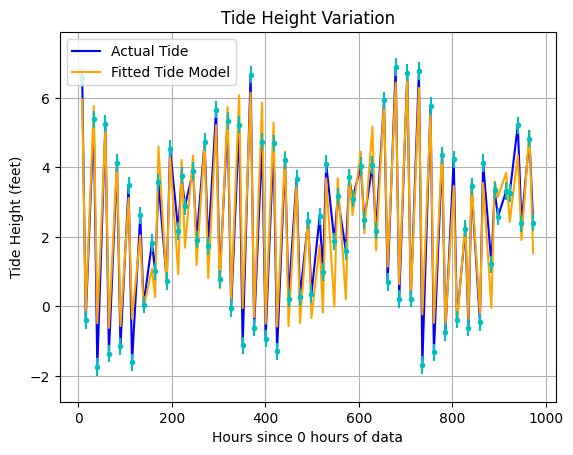

In [4]:
#Plot the figure
plt.figure()
plt.plot(t, actual_tide_values, label='Actual Tide', color='blue')
plt.plot(t, fitted_tide_values, label='Fitted Tide Model', color='orange')
plt.errorbar(t, actual_tide_values, yerr=.25, fmt='.c');
plt.ylim(min(actual_tide_values) - 1, max(actual_tide_values) + 1)
plt.xlabel("Hours since 0 hours of data")
plt.ylabel("Tide Height (feet)")
plt.legend()
plt.grid(True)
plt.title("Tide Height Variation")
plt.savefig("Waves.png")
plt.show()

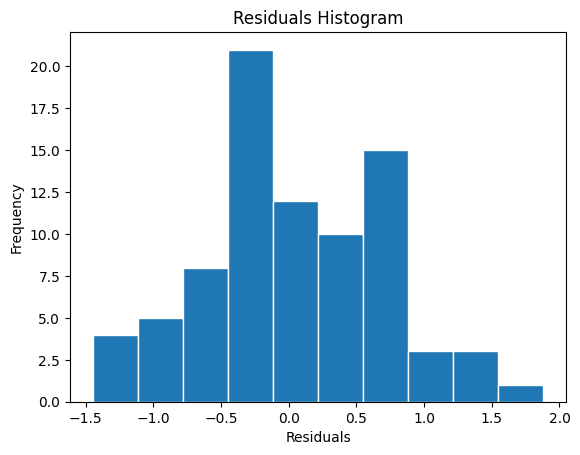

In [7]:
residuals = actual_tide_values - fitted_tide_values

# Plotting histogram 
plt.figure()
plt.hist(residuals, bins=10, edgecolor='white')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Histogram")
plt.show()

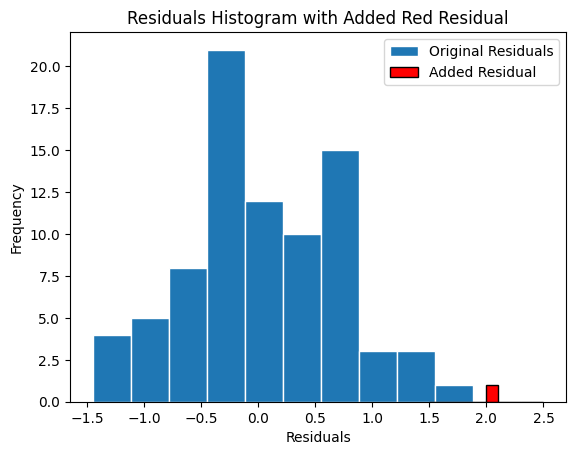

In [8]:
#Appending residual residual of value 2
residuals = np.append(residuals, 2)

# Plotting the histogram with the added residual in a different color
plt.figure()
#plt.hist(residuals, bins=10, edgecolor='black')
plt.hist(residuals[:-1], bins=10, edgecolor='white', label='Original Residuals')
plt.hist(residuals[-1], bins=10, edgecolor='black', color='red', label='Added Residual')
plt.legend()
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Histogram with Added Red Residual")
plt.show()